In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# sensitivity analysis bar plot
# group bars by parameter. 
groups = ['baseline', 'weight-decay', 'learning-rate', 'hidden dim', 'neighbors', 'layers', 'dropout', 'backbone noise']
data = {
    'baseline': {
        'ProteinMPNN': 4.272,
        'AdamW + Cosine': 4.435,
        '+ LR 3e-3': 4.335,
        '+ Linear Warmup + Dropout 0.1': 4.181,
    },
    'weight-decay': {
        '0': 4.55,
        '0.001': 4.554,
        '0.1': 4.751,
    },
    'learning-rate': {
        '1e-4': 5.43,
        '1e-2': 0,
    },
    'hidden dim': {
        '64': 4.659,
        '256': 4.524,
    },
    'neighbors': {
        '24': 4.638,
        '96': 4.346,
    },
    'layers': {
        '1': 4.886,
        '5': 4.409,
    },
    'dropout': {
        '0.1': 4.309,
        '0.2': 4.309,
    },
    'backbone noise': {
        '0.0': 3.453,
        '0.4': 5.064,
    },
}

# plot data in bar graph
plt.figure(figsize=(10, 6))

# Create a bar plot for each group
# group the bars together by group name



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_203250/3693632648.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', len(groups))


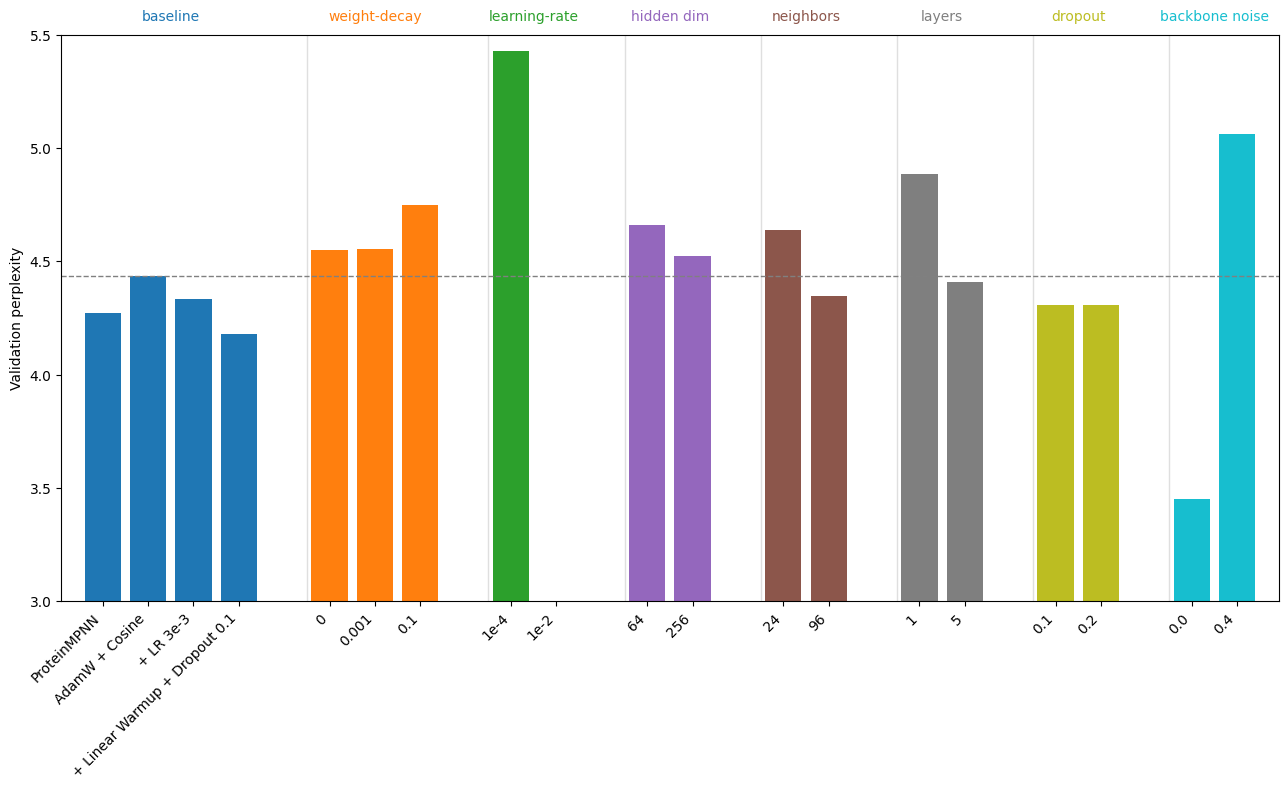

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# groups and data come from your snippet
# groups = [...]
# data = {...}

plt.figure(figsize=(13, 8))
ax = plt.gca()

# one color per group
cmap = plt.cm.get_cmap('tab10', len(groups))

x = []
heights = []
tick_labels = []
group_spans = []  # (start_idx, end_idx, group_name, color)
bar_colors = []

cursor = 0
for gi, g in enumerate(groups):
    opts = list(data[g].keys())
    vals = [data[g][k] for k in opts]
    n = len(opts)
    xs = list(range(cursor, cursor + n))
    col = cmap(gi)

    x.extend(xs)
    heights.extend(vals)
    tick_labels.extend(opts)
    group_spans.append((cursor, cursor + n - 1, g, col))
    bar_colors.extend([col] * n)

    cursor += n + 1  # gap between groups

# plot
ax.bar(x, heights, width=0.8, color=bar_colors, edgecolor='none')
ax.axhline(y=4.435, color='gray', linestyle='--', linewidth=1)
# option labels as x-ticks
ax.set_xticks(x)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# separators and group labels (on TOP to avoid overlap)
for i, (start_idx, end_idx, gname, col) in enumerate(group_spans):
    if i > 0:
        ax.axvline(x=start_idx - 0.5, linewidth=1, alpha=0.25, color='gray')
    mid = (start_idx + end_idx) / 2.0
    # put group names slightly above the top x-axis line using axis transform
    ax.text(
        mid, 1.02, gname,
        transform=ax.get_xaxis_transform(),
        ha='center', va='bottom', fontsize=10, color=col
    )

ax.set_ylabel('Validation perplexity')
ax.set_ylim(3, 5.5)
# ax.set_title('Sensitivity analysis by parameter group')
ax.margins(x=0.02)

# extra top margin so group labels don’t clip
plt.subplots_adjust(top=0.90, bottom=0.22)
plt.tight_layout()
plt.savefig('sensitivity_analysis.png', dpi=300)

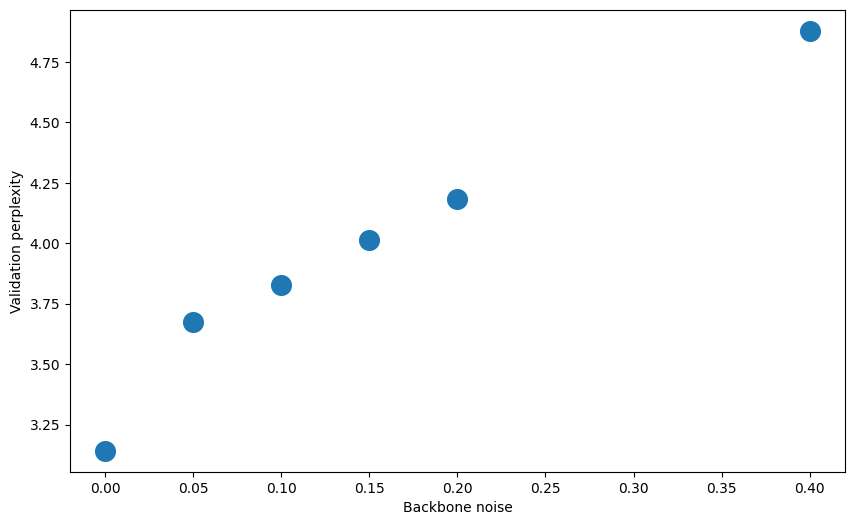

In [29]:
# scatter plot 

backbone_noise = [0.0, 0.05, 0.1, 0.15, 0.2, 0.4]
perplexity = [3.142, 3.674, 3.829, 4.015, 4.181, 4.879]

plt.figure(figsize=(10, 6))
# make dots bigger
plt.scatter(backbone_noise, perplexity, s=200)
plt.xlabel('Backbone noise')
plt.ylabel('Validation perplexity')
plt.savefig('backbone_noise_scatter.png', dpi=300)
plt.show()


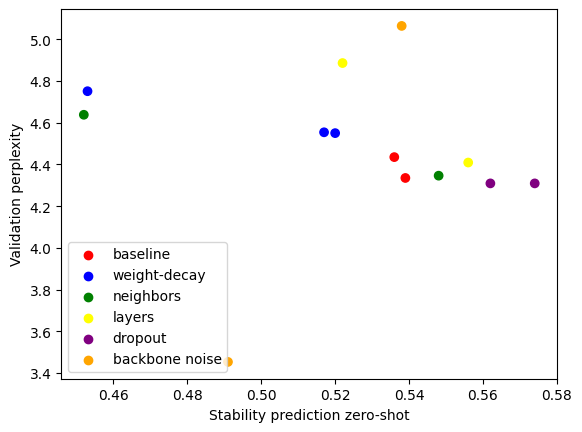

In [37]:
zero_shot_stab = {
    'baseline': {
        'AdamW + Cosine': 0.536,
        '+ LR 3e-3': 0.539,
    },
    'weight-decay': {
        '0': 0.520,
        '0.001': 0.517,
        '0.1': 0.453,
    },
    'neighbors': {
        '24': 0.452,
        '96': 0.548,
    },
    'layers': {
        '1': 0.522,
        '5': 0.556,
    },
    'dropout': {
        '0.1': 0.562,
        '0.2': 0.574,
    },
    'backbone noise': {
        '0.0': 0.491,
        '0.4': 0.538,
    },
}

# create scatter plot for keys that in both data and zero_shot_stab
# plot zero_shot_stab on x-axis and data on y-axis
 
stab_values = []
data_values = []
# different colors for different keys
colors = []
key_to_color = {
    'baseline': 'red',
    'weight-decay': 'blue',
    'neighbors': 'green',
    'layers': 'yellow',
    'dropout': 'purple',
    'backbone noise': 'orange',
}
for key in zero_shot_stab.keys():
    if key in data:
        for k, v in zero_shot_stab[key].items():
            stab_values.append(v)
            data_values.append(data[key][k])
            colors.append(key_to_color[key])

plt.scatter(stab_values, data_values, c=colors)
# make legend
plt.legend(handles=[plt.scatter([], [], c=v, label=k) for k, v in key_to_color.items()])
plt.xlabel('Stability prediction zero-shot')
plt.ylabel('Validation perplexity')
plt.savefig('zero_shot_stability_scatter.png', dpi=300)
plt.show()
